# 使用numpy进行线性回归

构建吸光度和浓度的线性回归方程，根据未知样品的吸光度估算样品浓度。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

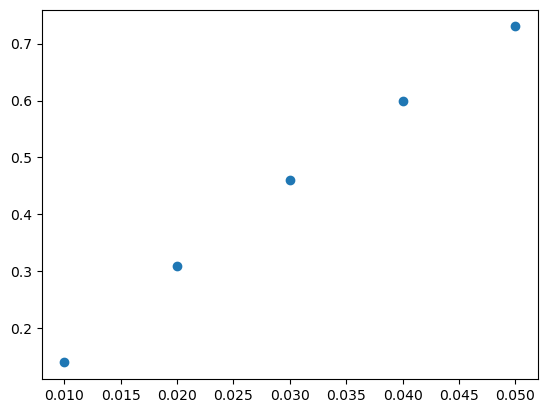

In [3]:
c = [0.01, 0.02, 0.03, 0.04, 0.05]
a = [0.14, 0.31, 0.46, 0.60, 0.73]
c = np.array(c)
a = np.array(a)
plt.plot(c, a, 'o', label='data')

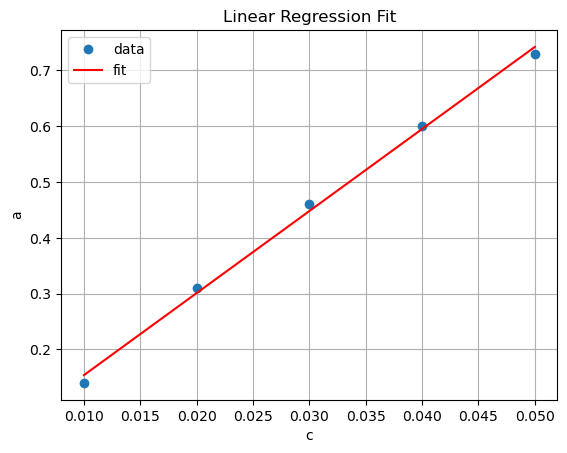

Slope: 14.699999999999996, Intercept: 0.006999999999999895
Mean Squared Error: 0.00011800000000000059
R-squared: 0.9972770906405759
Standard Deviation: 0.010862780491200243
Correlation Coefficient: 0.998637617276946
Bias: 2.1094237467877973e-16
Variance: 0.00011800000000000059
Standard Error: 0.00485798312059646
F-statistic: 1098.762711864401
P-value: 6.035229332967962e-05
T-statistic: 3025.947113252864
T-distribution P-value: 3.9797609652225674e-11


In [5]:
# 计算伪逆
A = np.vstack([c, np.ones(len(c))]).T
A_pseudo_inv = np.linalg.pinv(A)
# 计算线性回归系数
b = A_pseudo_inv @ a
# 计算拟合值
a_fit = A @ b

plt.plot(c, a, 'o', label='data')
plt.plot(c, a_fit, 'r-', label='fit')
plt.xlabel('c')
plt.ylabel('a')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid()
plt.show()
# 计算拟合的斜率和截距
slope = b[0]
intercept = b[1]
print(f"Slope: {slope}, Intercept: {intercept}")
# 计算拟合的均方误差
mse = np.mean((a - a_fit) ** 2)
print(f"Mean Squared Error: {mse}")
# 计算拟合的决定系数
r_squared = 1 - (np.sum((a - a_fit) ** 2) / np.sum((a - np.mean(a)) ** 2))
print(f"R-squared: {r_squared}")
# 计算拟合的标准差
std_dev = np.std(a - a_fit)
print(f"Standard Deviation: {std_dev}")
# 计算拟合的相关系数
correlation_coefficient = np.corrcoef(a, a_fit)[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")
# 计算拟合的偏差
bias = np.mean(a - a_fit)
print(f"Bias: {bias}")
# 计算拟合的方差
variance = np.var(a - a_fit)
print(f"Variance: {variance}")
# 计算拟合的标准误差
standard_error = np.std(a - a_fit) / np.sqrt(len(a))
print(f"Standard Error: {standard_error}")
# 计算拟合的F统计量
ssr = np.sum((a_fit - np.mean(a)) ** 2)
sse = np.sum((a - a_fit) ** 2)
sst = np.sum((a - np.mean(a)) ** 2)
f = (ssr / 1) / (sse / (len(a) - 2))
print(f"F-statistic: {f}")
# 计算拟合的p值
from scipy import stats
p_value = 1 - stats.f.cdf(f, 1, len(a) - 2)
print(f"P-value: {p_value}")
# 计算拟合的t统计量
t_statistic = slope / (std_dev / np.sqrt(len(a)))
print(f"T-statistic: {t_statistic}")
# 计算拟合的t分布的p值
t_p_value = 1 - stats.t.cdf(t_statistic, len(a) - 2)
print(f"T-distribution P-value: {t_p_value}")

In [9]:
au = 0.42
# 计算浓度
c = (au - intercept) / slope
print(f"Concentration for AU {au}: {c}")

Concentration for AU 0.42: 0.02809523809523811


6.180999999999997